<a href="https://colab.research.google.com/github/Leomuch/Praktikum_KB/blob/main/2209106082_MuchlasAndreyPahlevi_Posttest4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Muchlas Andrey Pahlevi
NIM  : 2209106082

# Analisis Data Pemain Sepak Bola

Notebook ini melakukan analisis dan prediksi nilai transfer pemain sepak bola menggunakan teknik regresi. Dalam notebook ini, kami akan menggunakan dua model regresi, yaitu Linear Regression dan Support Vector Regressor (SVR). Kami juga akan melakukan beberapa langkah pra-pemrosesan dan analisis data untuk memastikan model yang dibangun berkualitas.

## Import Library

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Membaca Dataset

In [2]:
df = pd.read_csv('/content/final_data.csv')

In [3]:
df.isnull().sum()

,0
player,0
team,0
name,0
position,0
height,0
age,0
appearance,0
goals,0
assists,0
yellow cards,0


In [4]:
duplicate = df.duplicated().sum()
print('Jumlah nilai duplikat pada data: ', duplicate)

Jumlah nilai duplikat pada data:  0


# Tranformasi Data
Kami menerapkan transformasi logaritmik pada kolom current_value, goals, dan appearance untuk mengurangi skewness dalam data, yang dapat membantu model dalam melakukan prediksi.

In [5]:
df['current_value'] = np.log(df['current_value'] + 1)
df['goals'] = np.log(df['goals'] + 1)
df['appearance'] = np.log(df['appearance'] + 1)

# Fitur Interaksi

In [6]:
# Buat fitur interaksi antara goals dan appearance
df['goals_appearance'] = df['goals'] * df['appearance']

# Visualisasi Outlier
Kami menggunakan boxplot untuk memvisualisasikan sebaran nilai current_value sebelum menangani outlier.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='current_value'>

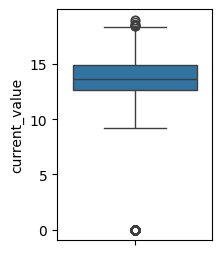

In [7]:
fig, ax = plt.subplots(figsize=(2,3)) #buat frame/figure
sns.boxplot(df['current_value']) #buat boxplot

# Menangani Outlier
Kami menggunakan metode Interquartile Range (IQR) untuk mengidentifikasi dan menghapus outlier dari kolom current_value.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


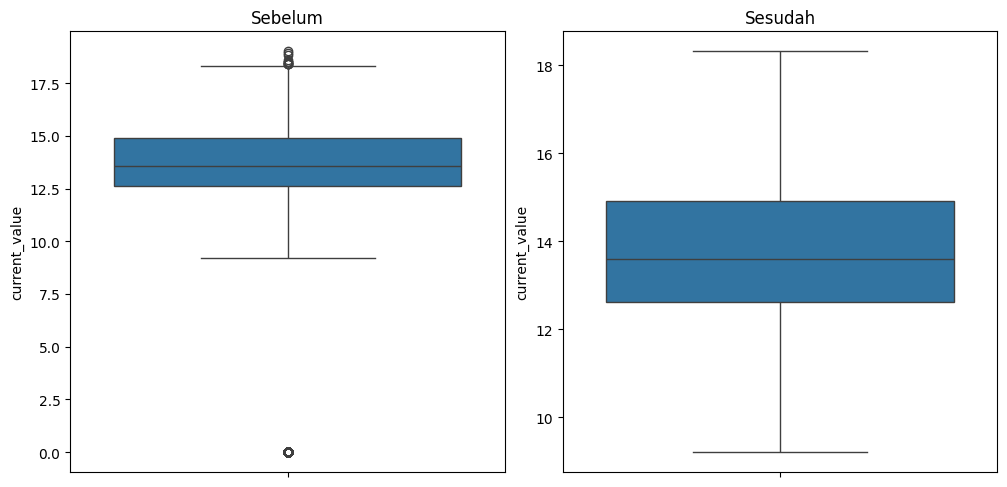

In [8]:
fig, axes = plt.subplots(1,2, figsize=(10, 5))
plt.tight_layout()
sns.boxplot(df['current_value'],orient='v',ax=axes[0])
axes[0].title.set_text("Sebelum")

# Menangani outlier dengan IQR
Q1 = df['current_value'].quantile(0.25)
Q3 = df['current_value'].quantile(0.75)
IQR = Q3 - Q1

#ambil nilai antara 1.5*IQR dari Q1 dan Q3 aja
df['current_value'] = df['current_value'][~((df['current_value'] < (Q1 - 1.5 * IQR)) |
(df['current_value'] > (Q3 + 1.5 * IQR)))]
#setelah handling oulier
sns.boxplot(df['current_value'],orient='v',ax=axes[1])
axes[1].title.set_text("Sesudah")
plt.show()

# Input Missing Value setelah Handling Outlier
Kami menggunakan SimpleImputer untuk mengisi nilai yang hilang di kolom current_value dengan nilai rata-rata.

In [9]:
imputer = SimpleImputer(strategy='mean')

# Terapkan imputasi pada kolom age yang memiliki missing values
df['current_value'] = imputer.fit_transform(df[['current_value']])

## Menyiapkan Fitur dan Target

In [10]:
# X adalah fitur (independent variables), termasuk fitur interaksi baru
X = df[['appearance', 'goals', 'goals_appearance']]

# y adalah target (dependent variable) yaitu current_value (transfer fee)
y = df['current_value']

# Split Data
Data dibagi menjadi training set (80%) dan test set (20%) menggunakan train_test_split.

In [11]:
# Membagi dataset menjadi training set dan test set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scalling Data
Kami menggunakan MinMaxScaler untuk menormalkan fitur agar berada dalam rentang [0, 1]. Penskalaan diterapkan pada data training dan testing.

In [12]:
# Inisialisasi scaler
scaler = MinMaxScaler()

# Fit scaler pada data training dan transformasi data training
X_train_scaled = scaler.fit_transform(X_train)

# Transformasi data testing dengan scaler yang sama
X_test_scaled = scaler.transform(X_test)

# A1

# Pelatihan Model Linear Regression

In [13]:
# Inisialisasi model Linear Regression
lr_model = LinearRegression()

# Melatih model menggunakan data training
lr_model.fit(X_train, y_train)

LinearRegression()

# Pelatihan Model Support Vector Regressor

In [14]:
# Inisialisasi model Support Vector Regressor
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

# Melatih model menggunakan data training
svr_model.fit(X_train, y_train)

SVR(C=100, gamma=0.1)

# Prediksi
Model melakukan prediksi pada data testing untuk mendapatkan nilai prediksi y_pred_svr untuk Support Vector Regressor dan y_pred_lr untuk Linear Regression.

In [15]:
# Prediksi nilai target pada data testing
y_pred_svr = svr_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

# A2
# Hasil Prediksi

In [16]:
  # Evaluasi performa SV Linier
mae_svr = mean_absolute_error(y_test, y_pred_lr)
mse_svr = mean_squared_error(y_test, y_pred_lr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_lr)

print(f"SVR - MAE: {mae_svr}")
print(f"SVR - MSE: {mse_svr}")
print(f"SVR - RMSE: {rmse_svr}")
print(f"SVR - R²-Score: {r2_svr}")

SVR - MAE: 1.1339968314923472
SVR - MSE: 1.9337940169946564
SVR - RMSE: 1.3906092251220887
SVR - R²-Score: 0.2966436050984982


In [17]:
  # Evaluasi performa SVR
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR - MAE: {mae_svr}")
print(f"SVR - MSE: {mse_svr}")
print(f"SVR - RMSE: {rmse_svr}")
print(f"SVR - R²-Score: {r2_svr}")

SVR - MAE: 1.0471115079252715
SVR - MSE: 1.684754084482552
SVR - RMSE: 1.297980772000322
SVR - R²-Score: 0.3872240017585584


# A3
# Buat Plot

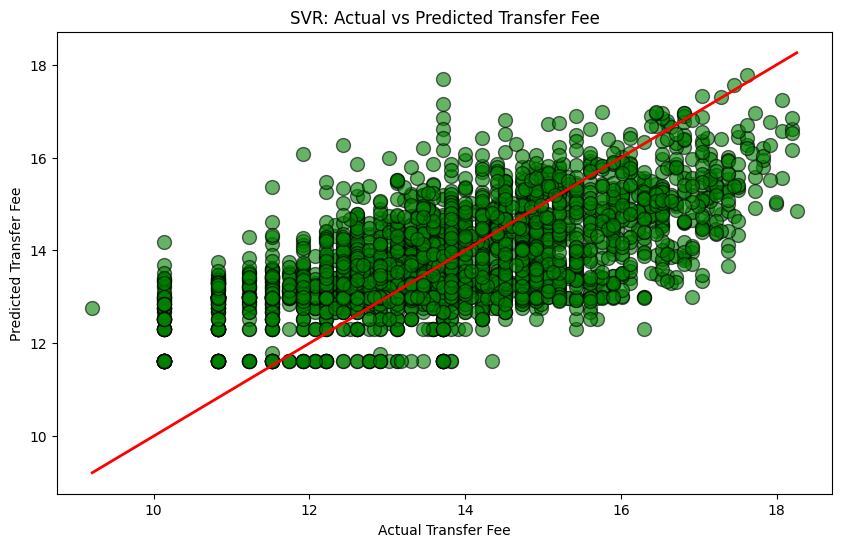

In [18]:
# Plot prediksi SVR vs nilai asli
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_svr, color='green', edgecolor='k', alpha=0.6, s=100)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Transfer Fee')
plt.ylabel('Predicted Transfer Fee')
plt.title('SVR: Actual vs Predicted Transfer Fee')
plt.show()